In [380]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Chargement des données

In [381]:
iris=pd.read_csv('./iris.txt', sep='\t', header=None)

In [382]:
X=iris.iloc[:,:-1].values
Y=iris.iloc[:, -1].values

In [383]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 1/3, random_state = 1)

In [384]:
class Perc:
    def __init__(self):
        self.weight = np.zeros(4)

    def predict(self, x):
        prob1 = np.dot(self.weight, x)
        if prob1 > 0:
            return [0.0, 1.0]
        return [1.0, 0.0]

    def reset(self):
        self.weight = np.zeros(4)

In [385]:
P1 = Perc()
P2 = Perc()
P3 = Perc()

In [386]:
def predict(XDeTest):
    YPred1 = P1.predict(XDeTest)
    YPred2 = P2.predict(XDeTest)
    YPred3 = P3.predict(XDeTest)
    proba = np.array([YPred1[1], YPred2[1], YPred3[1]])
    algo = proba.argmax()+1
    return algo

def predictAll(XALL):
    ret = np.zeros(len(XALL))
    for i in range(0, len(XALL)):
        ret[i] = predict(XALL[i])
    return ret


def fit(XdeTrain, YDeTrain, epochs=500, eta=0.1, reset=False):
    if reset:
        P1.reset()
        P2.reset()
        P3.reset()
    for epoch in range(0, epochs):
        for i in range(len(XdeTrain)):
            donneeX = XdeTrain[i]
            donneeY = YDeTrain[i]

            Y1 = P1.predict(donneeX)
            Y2 = P2.predict(donneeX)
            Y3 = P3.predict(donneeX)

            if donneeY == 1:
                if Y1[1] != 1:
                    P1.weight += eta*donneeX
                if Y2[1] == 1:
                    P2.weight -= eta*donneeX
                if Y3[1] == 1:
                    P3.weight -= eta*donneeX

            if donneeY == 2:
                if Y2[1] != 1:
                    P2.weight += eta*donneeX
                if Y1[1] == 1:
                    P1.weight -= eta*donneeX
                if Y3[1] == 1:
                    P3.weight -= eta*donneeX

            if donneeY == 3:
                if Y3[1] != 1:
                    P3.weight += eta*donneeX
                if Y2[1] == 1:
                    P2.weight -= eta*donneeX
                if Y1[1] == 1:
                    P1.weight -= eta*donneeX


In [387]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
def matrix(YPred, YTest):
    cm = confusion_matrix(YTest, YPred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    print("Accuracy : " + str(accuracy_score(y_true=Ytest, y_pred=YPred)))
    print("Precision 1 : " + str(precision_score(y_true=Ytest, y_pred=YPred, average=None)[0]))
    print("Precision 2 : " + str(precision_score(y_true=Ytest, y_pred=YPred, average=None)[1]))
    print("Precision 3 : " + str(precision_score(y_true=Ytest, y_pred=YPred, average=None)[2]))
    print("Recall 1 : " + str(recall_score(y_true=Ytest, y_pred=YPred, average=None)[0]))
    print("Recall 2 : " + str(recall_score(y_true=Ytest, y_pred=YPred, average=None)[1]))
    print("Recall 3 : " + str(recall_score(y_true=Ytest, y_pred=YPred, average=None)[2]))

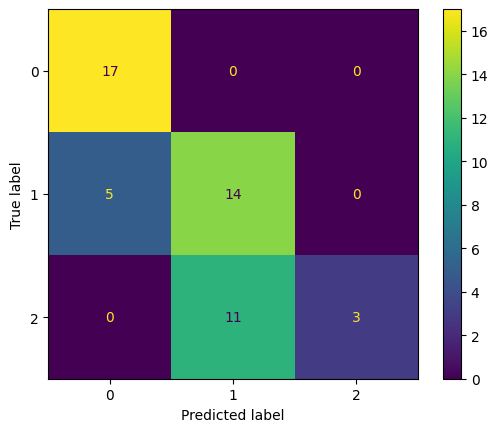

Accuracy : 0.68
Precision 1 : 0.7727272727272727
Precision 2 : 0.56
Precision 3 : 1.0
Recall 1 : 1.0
Recall 2 : 0.7368421052631579
Recall 3 : 0.21428571428571427


In [388]:
fit(Xtrain, Ytrain, epochs=10000, eta=0.1, reset=True)
matrix(predictAll(Xtest), Ytest)

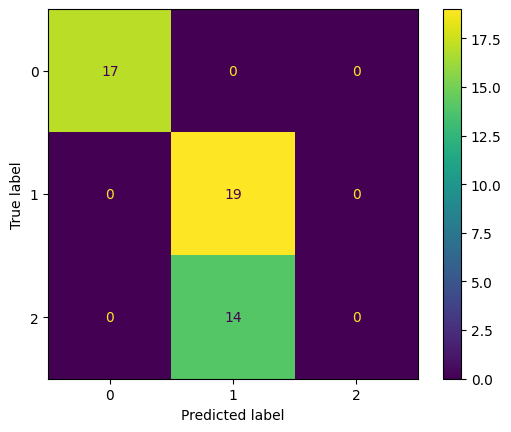

Accuracy : 0.72
Precision 1 : 1.0
Precision 2 : 0.5757575757575758
Precision 3 : 0.0
Recall 1 : 1.0
Recall 2 : 1.0
Recall 3 : 0.0


In [389]:
from sklearn.preprocessing import StandardScaler

StS = StandardScaler()
StS.fit(Xtrain)
Xtrain_norm = StS.transform(Xtrain)
Xtest_norm = StS.transform(Xtest)

fit(Xtrain_norm, Ytrain, epochs=10000, eta=0.1, reset=True)
matrix(predictAll(Xtest_norm), Ytest)